# This notebook contains a slightly different model

In this model I experimented with dropping more variables from the start. The model performed a ne

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sns.set(font_scale = 1)
%matplotlib inline

In [3]:
df = pd.read_csv('Data/churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#dropping area code, phone number

clean = df.drop(['area code', 'phone number'], axis=1)
clean.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#yes/no to 0/1
clean['international plan'].replace(['no','yes'], [0,1], inplace = True)
clean['voice mail plan'].replace(['no','yes'], [0,1], inplace = True)
clean['churn'].replace([False, True], [0,1], inplace = True)

In [7]:
#churn probs
clean['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [8]:
clean['state'].describe()

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object

In [9]:
#states?
clean['state'].value_counts().sort_index(ascending=True)

AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: state, dtype: int64

In [10]:
clean.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [11]:
clean.corr()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


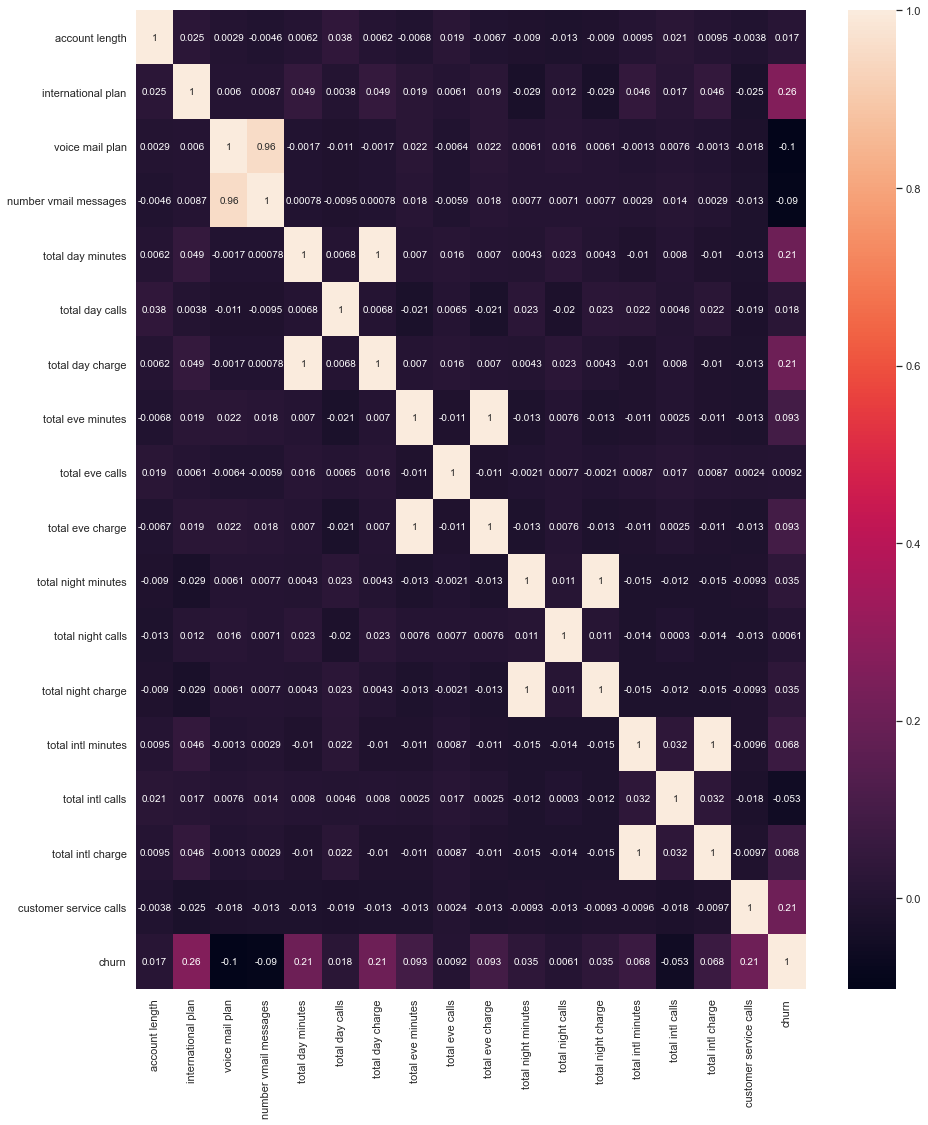

In [12]:
#heatmap version bc it's cuter
fig, ax = plt.subplots(figsize=(15, 18))

sns.heatmap(clean.corr(), annot=True);

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


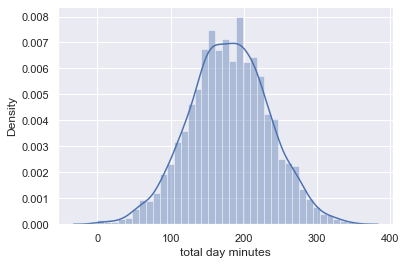

In [15]:
#is it sketchy that day charge and day minutes are the same

sns.distplot(clean['total day minutes']);

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


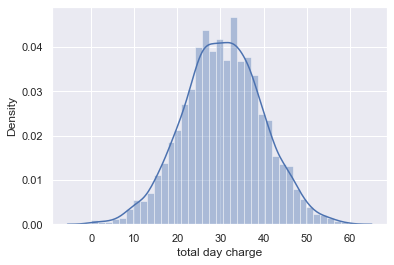

In [16]:
sns.distplot(clean['total day charge']);

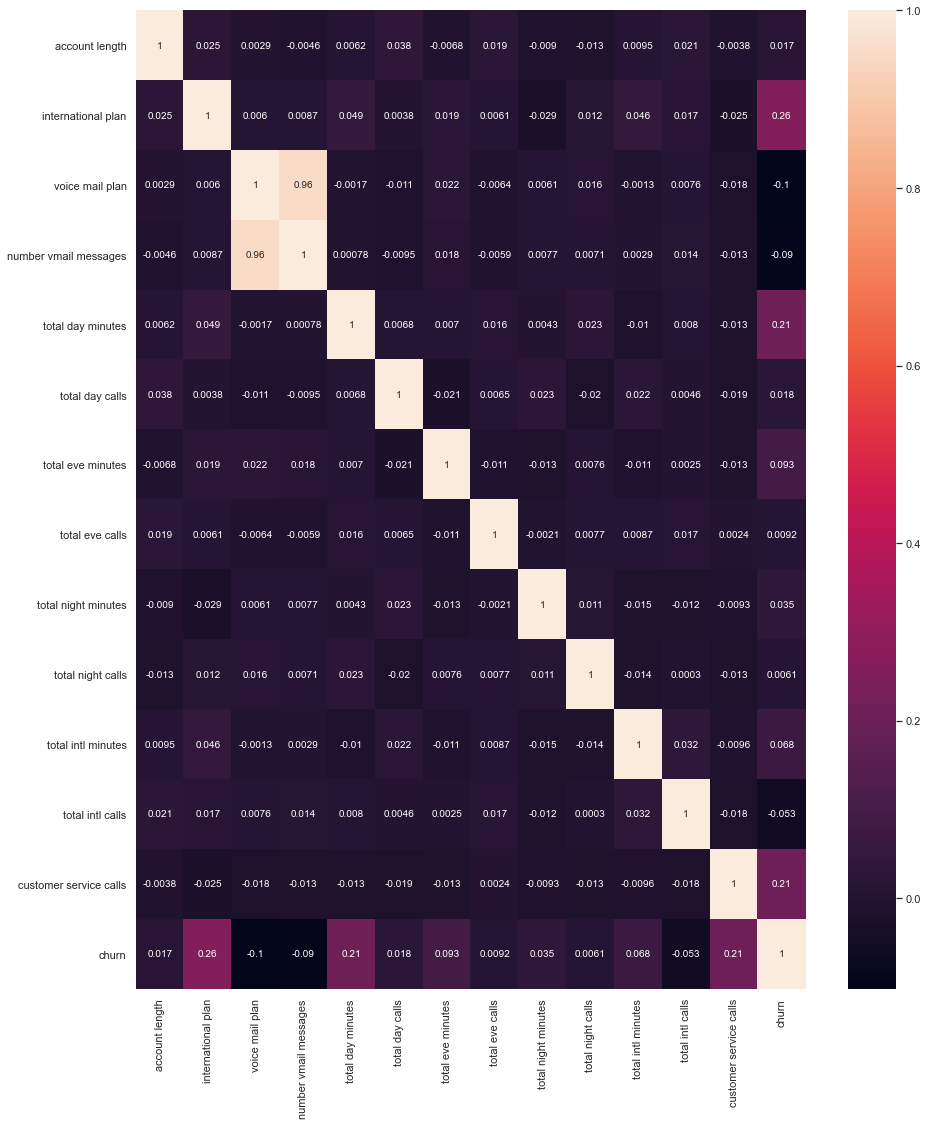

In [19]:
#how does it change if we drop all of the columns that are too correlated with eachother? 

sanitycheck = clean.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1)
fig, ax = plt.subplots(figsize=(15, 18))

sns.heatmap(sanitycheck.corr(), annot=True);

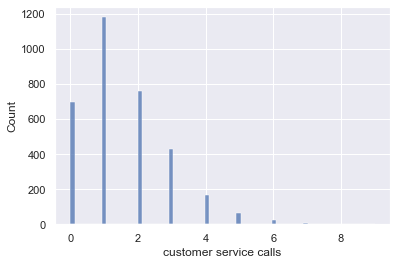

In [33]:
sns.histplot(sanitycheck['customer service calls']);

In [34]:
clean = sanitycheck.copy()
clean.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


# High corr churn

- `Intl Plan` highest
- `Cust Service Calls`
- `Total Day Minutes`

# First Model

In [35]:
# define X & y
# dropping state since it can't be conv to cont numeric var
X = clean.drop(['churn', 'state'], axis = 1)
y = clean['churn']

# Decision Tree Classifier 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dtc1 = DecisionTreeClassifier(max_depth = 2, random_state=42)
dtc1.fit(X_train, y_train)
dtc1

DecisionTreeClassifier(max_depth=2, random_state=42)

In [36]:
trainpred = dtc1.predict(X_train)
testpred = dtc1.predict(X_test)

In [37]:
#preds from paul's code
prediction = dtc1.predict(X_test)

print ('\n clasification report:\n', classification_report(y_test,prediction))


 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       712
           1       0.69      0.20      0.31       122

    accuracy                           0.87       834
   macro avg       0.78      0.59      0.62       834
weighted avg       0.85      0.87      0.84       834



In [38]:
#paul's feature importance code seems useful
# get importance
importance = dtc1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Accuracy on training data & test data
print('Training:', dtc1.score(X_train, y_train))
print('Testing:', dtc1.score(X_test, y_test))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.58457
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.41543
Training: 0.8803521408563425
Testing: 0.8693045563549161


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  customer service calls  3333 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 338.6 KB


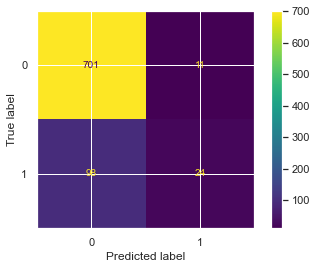

In [40]:
plot_confusion_matrix(dtc1, X_test, y_test);

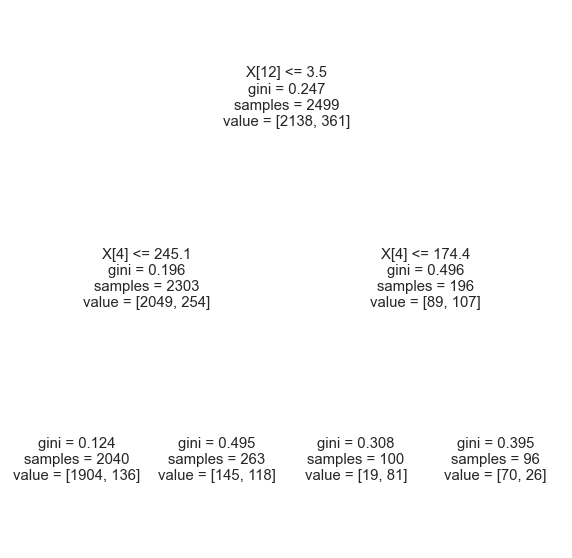

In [41]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(dtc1, ax=ax);

# Second Model

In [43]:
# Separate data into feature and target DataFrames
X = clean.drop(columns = ['churn', 'state'], axis = 1)
y = clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create model with increased max_depth
dtc2 = DecisionTreeClassifier(max_depth = 5, random_state=42)

# fit the model
dtc2.fit(X_train, y_train)

# get importance
importance = dtc2.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Accuracy on training data & test data
print('Training:', dtc2.score(X_train, y_train))
print('Testing:', dtc2.score(X_test, y_test))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.09604
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.06773
Feature: 4, Score: 0.31292
Feature: 5, Score: 0.00808
Feature: 6, Score: 0.13616
Feature: 7, Score: 0.00768
Feature: 8, Score: 0.02236
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.10570
Feature: 11, Score: 0.08239
Feature: 12, Score: 0.16094
Training: 0.9555822328931572
Testing: 0.9280575539568345


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  customer service calls  3333 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 338.6 KB


# Third DTC Model + Cross Validation


The algorithm is defined with any required hyperparameters (we will use the defaults), then we will use repeated stratified k-fold cross-validation to evaluate the model. We will use three repeats of 10-fold cross-validation, meaning that 10-fold cross-validation is applied three times fitting and evaluating 30 models on the dataset.

The dataset is stratified, meaning that each fold of the cross-validation split will have the same class distribution as the original dataset. We will evaluate the model using the ROC area under curve (AUC) metric. This can be optimistic for severely imbalanced datasets but will still show a relative change with better performing models.

In [47]:
# Separate data into feature and target DataFrames
X = clean.drop(columns = ['churn', 'state'], axis = 1)
y = clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# define model
dtc3 = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dtc3, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.775


In [49]:
# fit the model
dtc3.fit(X_train, y_train)

# get importance
importance = dtc3.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02329
Feature: 1, Score: 0.07001
Feature: 2, Score: 0.00911
Feature: 3, Score: 0.05154
Feature: 4, Score: 0.26603
Feature: 5, Score: 0.02449
Feature: 6, Score: 0.15835
Feature: 7, Score: 0.03126
Feature: 8, Score: 0.06421
Feature: 9, Score: 0.01583
Feature: 10, Score: 0.08918
Feature: 11, Score: 0.08214
Feature: 12, Score: 0.11457


# FOURTH DTC MODEL USING SMOTE

Now, we can try the same model and the same evaluation method, although use a SMOTE transformed version of the dataset. This can be achieved by defining a Pipeline that first transforms the training dataset with SMOTE then fits the model. This pipeline can then be evaluated using repeated k-fold cross-validation.

In [50]:
# Separate data into feature and target DataFrames
X = clean.drop(columns = ['churn', 'state'], axis = 1)
y = clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
dtc4 = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dtc4, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.729


## DTC MODEL EVALUATION AND COMPARISON

In [52]:
# Separate data into feature and target DataFrames
X = clean.drop(columns = ['churn', 'state'], axis = 1)
y = clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model
dtc3.fit(X_train, y_train)
dtc4.fit(X_train, y_train)

# get predictions for each of the 3 models
prediction1 = dtc1.predict(X_test)
prediction2 = dtc2.predict(X_test)
prediction3 = dtc3.predict(X_test)
prediction4 = dtc4.predict(X_test)

print ('\n clasification report 1:\n', classification_report(y_test,prediction1))
print ('\n clasification report 2:\n', classification_report(y_test,prediction2))
print ('\n clasification report 3:\n', classification_report(y_test,prediction3))
print ('\n clasification report 4:\n', classification_report(y_test,prediction4))


 clasification report 1:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       712
           1       0.69      0.20      0.31       122

    accuracy                           0.87       834
   macro avg       0.78      0.59      0.62       834
weighted avg       0.85      0.87      0.84       834


 clasification report 2:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       712
           1       0.80      0.68      0.73       122

    accuracy                           0.93       834
   macro avg       0.87      0.83      0.85       834
weighted avg       0.92      0.93      0.93       834


 clasification report 3:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       712
           1       0.67      0.71      0.69       122

    accuracy                           0.91       834
   macro avg       0.81      0.83      0.82    

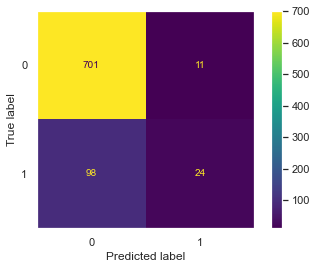

In [69]:
plot_confusion_matrix(dtc1, X_test, y_test);
plt.grid(False)

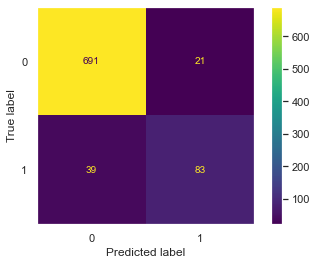

In [71]:
plot_confusion_matrix(dtc2, X_test, y_test);
plt.grid(False)

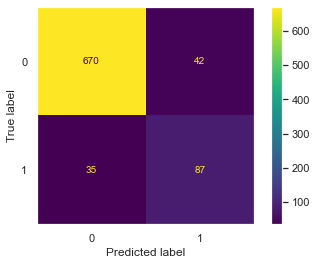

In [72]:
plot_confusion_matrix(dtc3, X_test, y_test);
plt.grid(False)

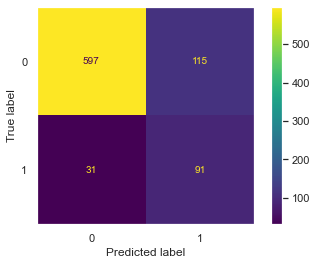

In [74]:
plot_confusion_matrix(dtc4, X_test, y_test);
plt.grid(False)

We aim to reduce the number of false negatives. Even though the 4th model produced the least false negatives, it also predicated an overwhelming amount of false positives. The 2nd model performed the best because it even though it has 4 higher false negatives, it has the best accuracy, precision and f1 score.

# FIRST SIMPLE MODEL

In [76]:
# Separate data into feature and target DataFrames
X = clean.drop(columns = ['churn', 'state'], axis = 1)
y = clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data for Logistic Regression modeling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Train a logistic regresssion model with the train data
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [77]:
# Accuracy on training data & test data
print('Training:', log_model.score(X_train_sc, y_train))
print('Testing:', log_model.score(X_test_sc, y_test))

Training: 0.8651460584233693
Testing: 0.8525179856115108


In [78]:
# get importance
importance = log_model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04127
Feature: 1, Score: 0.59991
Feature: 2, Score: -0.69436
Feature: 3, Score: 0.26207
Feature: 4, Score: 0.69611
Feature: 5, Score: 0.04153
Feature: 6, Score: 0.36130
Feature: 7, Score: 0.03495
Feature: 8, Score: 0.21378
Feature: 9, Score: -0.00477
Feature: 10, Score: 0.23513
Feature: 11, Score: -0.33068
Feature: 12, Score: 0.72089


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 2654 to 1061
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   int64  
 1   international plan      2499 non-null   int64  
 2   voice mail plan         2499 non-null   int64  
 3   number vmail messages   2499 non-null   int64  
 4   total day minutes       2499 non-null   float64
 5   total day calls         2499 non-null   int64  
 6   total eve minutes       2499 non-null   float64
 7   total eve calls         2499 non-null   int64  
 8   total night minutes     2499 non-null   float64
 9   total night calls       2499 non-null   int64  
 10  total intl minutes      2499 non-null   float64
 11  total intl calls        2499 non-null   int64  
 12  customer service calls  2499 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 273.3 KB


In [80]:
predictions = log_model.predict(X_test_sc)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       712
           1       0.49      0.18      0.26       122

    accuracy                           0.85       834
   macro avg       0.68      0.57      0.59       834
weighted avg       0.82      0.85      0.82       834



## SECOND LOG REG MODEL USING SMOTE

In [81]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# Using SMOTE to balance data
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train_sc, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 361
Before OverSampling, counts of label '0': 2138 

After OverSampling, the shape of train_X: (4276, 13)
After OverSampling, the shape of train_y: (4276,) 

After OverSampling, counts of label '1': 2138
After OverSampling, counts of label '0': 2138


In [82]:
log_model_bal = LogisticRegression(random_state=42)
log_model_bal.fit(X_train_res, y_train_res)
predictions = log_model_bal.predict(X_test_sc)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       712
           1       0.34      0.72      0.46       122

    accuracy                           0.75       834
   macro avg       0.64      0.74      0.65       834
weighted avg       0.85      0.75      0.78       834



## USING GRIDSEARCH TO REFINE HYPERPARAMETERS

In [84]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

# Fit the model on scaled training data
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [85]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8643469879518072


## LOG REG MODEL WITH TUNED HYPERPARAMETERS

In [87]:
logreg = LogisticRegression(C = 0.01, 
                            penalty = 'l2', 
                            solver = 'newton-cg')
logreg.fit(X_train_sc, y_train)
y_pred = logreg.predict(X_test_sc)

# print accuracy and classification report
print("Accuracy:",logreg.score(X_test_sc, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.8561151079136691
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       712
           1       0.55      0.09      0.15       122

    accuracy                           0.86       834
   macro avg       0.71      0.54      0.54       834
weighted avg       0.82      0.86      0.81       834



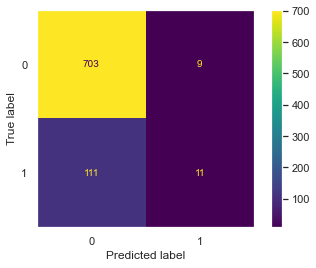

In [90]:
plot_confusion_matrix(logreg, X_test_sc, y_test);
plt.grid(False)

# GRIDSEARCH ON ENTIRE DATASET

In [92]:
# Separate data into feature and target DataFrames
X = clean.drop(columns = ['churn', 'state'], axis = 1)
y = clean['churn']

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, 
                   param_grid = parameters,
                   scoring = 'accuracy', 
                   cv = 10)
clf.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [93]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8619850389311468


## BUILDING FINAL MODEL WITH SCALED & BALANCED DATA AND TUNED HYPERPARAMETERS

In [95]:
# Separate data into feature and target DataFrames
X = clean.drop(columns = ['churn', 'state'], axis = 1)
y = clean['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data for Logistic Regression modeling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Using SMOTE to balance data
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train_sc, y_train)

log_model_final = LogisticRegression(C = .1, 
                            penalty = 'l2', 
                            solver = 'newton-cg',
                            random_state=42)
log_model_final.fit(X_train_res, y_train_res)

LogisticRegression(C=0.1, random_state=42, solver='newton-cg')

In [97]:
# Evaluation metrics

y_pred = log_model_final.predict(X_test_sc)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       712
           1       0.34      0.71      0.46       122

    accuracy                           0.75       834
   macro avg       0.64      0.74      0.65       834
weighted avg       0.85      0.75      0.78       834



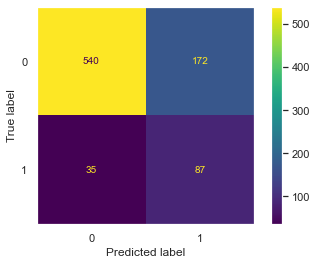

In [98]:
plot_confusion_matrix(log_model_final, X_test_sc, y_test);
plt.grid(False)

In [99]:
log_odds = log_model_final.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
customer service calls,0.911451
total day minutes,0.775735
international plan,0.681459
total eve minutes,0.373647
number vmail messages,0.318492
total night minutes,0.260964
total intl minutes,0.209786
total eve calls,0.072924
account length,0.058666
total day calls,0.036238


In [100]:
odds = np.exp(log_model_final.coef_[0])
odds_chart = pd.DataFrame(odds, 
                          X.columns, 
                          columns=['coef'])\
                          .sort_values(by='coef', ascending=False)

odds_chart.reset_index(drop=False, inplace=True)
odds_chart

,index,coef
0,customer service calls,2.487929
1,total day minutes,2.172188
2,international plan,1.976759
3,total eve minutes,1.453025
4,number vmail messages,1.375053
5,total night minutes,1.298181
6,total intl minutes,1.233414
7,total eve calls,1.075649
8,account length,1.060421
9,total day calls,1.036902


# GET FEATURES OF CUSTOMERS MOST LIKELY TO CHURN

Based on this model, predicting the probability that someone will churn, then ranking them in terms of priority

In [101]:
final_results = X_test.copy()

final_results = pd.concat([final_results, y_test], axis=1)
final_results = pd.DataFrame(final_results)
final_results = final_results[['customer service calls', 
                               'total day minutes', 
                               'international plan', 
                               'total eve minutes',
                               'number vmail messages',
                              ]]

final_results

,customer service calls,total day minutes,international plan,total eve minutes,number vmail messages
2360,2,222.1,0,199.4,0
600,2,102.6,0,246.0,0
1501,0,272.4,0,107.9,0
1114,1,165.1,0,267.0,15
517,2,214.7,0,158.6,0
...,...,...,...,...,...
688,3,315.6,0,208.9,21
181,5,58.2,0,138.7,0
1448,4,242.5,0,162.3,0
2085,1,138.5,0,153.2,0


In [102]:
#probability score
y_pred_probs = log_model_final.predict_proba(X_test_sc)
y_pred_probs = y_pred_probs [:, 1]

y_pred_probs

array([0.52530075, 0.17666755, 0.34954415, 0.15839617, 0.35047498,
       0.56901173, 0.35175547, 0.2432821 , 0.65324076, 0.27826351,
       0.52740029, 0.78063818, 0.4437175 , 0.7934448 , 0.75399073,
       0.21755832, 0.71592752, 0.27655003, 0.22456734, 0.51465289,
       0.61754634, 0.18104137, 0.20621982, 0.11434533, 0.07726889,
       0.01198343, 0.26358024, 0.63626154, 0.36618318, 0.60291083,
       0.56478394, 0.09314378, 0.04644397, 0.2765595 , 0.36379023,
       0.27925088, 0.21166258, 0.10885945, 0.76840539, 0.19839462,
       0.43355148, 0.40057695, 0.40904748, 0.65065305, 0.04827802,
       0.83914908, 0.16249528, 0.59443389, 0.44965736, 0.87146956,
       0.78430894, 0.01321758, 0.65346829, 0.24844653, 0.51373376,
       0.31178146, 0.12362947, 0.38657699, 0.3258215 , 0.25908393,
       0.08903125, 0.75389029, 0.75492594, 0.75653842, 0.29326216,
       0.29794146, 0.03253415, 0.68618152, 0.01779668, 0.21891166,
       0.16317689, 0.35028681, 0.65942524, 0.15163094, 0.86065

In [103]:
final_results['predictions'] = y_pred
final_results["propensity to churn %"] = y_pred_probs

final_results

,customer service calls,total day minutes,international plan,total eve minutes,number vmail messages,predictions,propensity to churn %
2360,2,222.1,0,199.4,0,1,0.525301
600,2,102.6,0,246.0,0,0,0.176668
1501,0,272.4,0,107.9,0,0,0.349544
1114,1,165.1,0,267.0,15,0,0.158396
517,2,214.7,0,158.6,0,0,0.350475
...,...,...,...,...,...,...,...
688,3,315.6,0,208.9,21,1,0.837851
181,5,58.2,0,138.7,0,0,0.469819
1448,4,242.5,0,162.3,0,1,0.853914
2085,1,138.5,0,153.2,0,0,0.092910


In [104]:
final_results['propensity to churn %'] = final_results["propensity to churn %"]*100
final_results["propensity to churn %"]=final_results["propensity to churn %"].round(2)
final_results ['ranking'] = pd.qcut(final_results['propensity to churn %'].rank(method = 'first'),10,labels=range(10,0,-1))
final_results.head()

,customer service calls,total day minutes,international plan,total eve minutes,number vmail messages,predictions,propensity to churn %,ranking
2360,2,222.1,0,199.4,0,1,52.53,3
600,2,102.6,0,246.0,0,0,17.67,7
1501,0,272.4,0,107.9,0,0,34.95,5
1114,1,165.1,0,267.0,15,0,15.84,8
517,2,214.7,0,158.6,0,0,35.05,5


# Attributes of top priority clients
Distributions of the following variables:
- `customer service calls`
- `total day minutes`
- `international plan`
- `total eve minutes`
- `number vmail messages`

In [105]:
priority1 = final_results[(final_results['ranking'] == 1)]
pd.set_option('display.max_rows', None)
priority1.sort_values(by=['propensity to churn %'], ascending=False)

,customer service calls,total day minutes,international plan,total eve minutes,number vmail messages,predictions,propensity to churn %,ranking
2732,5,216.2,1,363.7,0,1,99.78,1
2380,9,228.6,0,132.8,0,1,99.40,1
2139,3,252.3,1,207.0,0,1,98.66,1
3304,4,186.1,1,198.6,0,1,97.86,1
351,4,220.1,1,234.3,38,1,97.76,1
81,3,215.4,1,204.8,0,1,97.37,1
1502,8,210.0,0,232.7,40,1,96.79,1
2660,4,301.5,0,257.7,0,1,96.37,1
1593,1,273.9,1,278.6,0,1,96.26,1
180,4,197.1,1,214.5,23,1,95.92,1


In [106]:
priority1.describe()

,customer service calls,total day minutes,international plan,total eve minutes,number vmail messages,predictions,propensity to churn %
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000
mean,3.380952,212.939286,0.500000,204.904762,6.559524,1.0,88.440595
std,1.776044,56.230314,0.503003,55.083999,13.050736,0.0,6.095500
min,0.000000,70.800000,0.000000,60.800000,0.000000,1.0,78.460000
25%,2.000000,172.675000,0.000000,175.700000,0.000000,1.0,83.057500
50%,3.000000,218.850000,0.500000,209.000000,0.000000,1.0,88.875000
75%,5.000000,245.950000,1.000000,233.100000,0.000000,1.0,93.482500
max,9.000000,335.500000,1.000000,363.700000,41.000000,1.0,99.780000


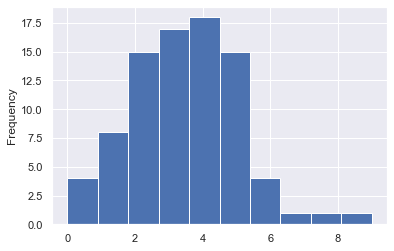

In [107]:
priority1['customer service calls'].plot(kind='hist');

In [108]:
priority1['customer service calls'].describe()

count    84.000000
mean      3.380952
std       1.776044
min       0.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       9.000000
Name: customer service calls, dtype: float64

In [109]:
priority1['customer service calls'].value_counts()

4    18
3    17
5    15
2    15
1     8
6     4
0     4
9     1
8     1
7     1
Name: customer service calls, dtype: int64

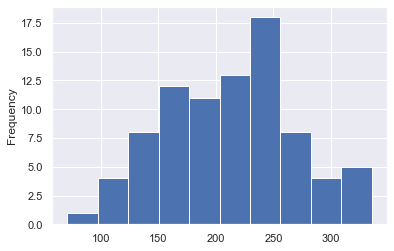

In [110]:
priority1['total day minutes'].plot(kind='hist');

In [111]:
priority1['total day minutes'].describe()

count     84.000000
mean     212.939286
std       56.230314
min       70.800000
25%      172.675000
50%      218.850000
75%      245.950000
max      335.500000
Name: total day minutes, dtype: float64

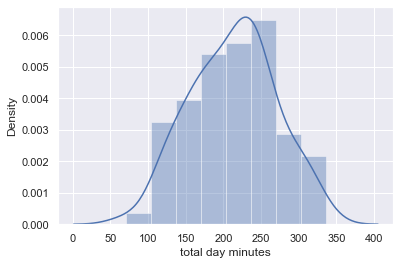

In [112]:
sns.distplot(priority1['total day minutes']);

In [113]:
priority1['international plan'].value_counts()

1    42
0    42
Name: international plan, dtype: int64

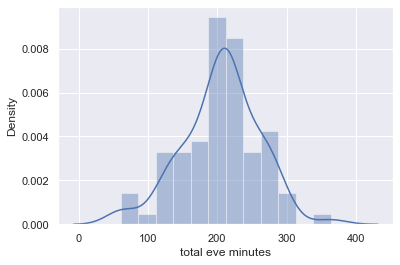

In [114]:
sns.distplot(priority1['total eve minutes']);

In [115]:
priority1['total eve minutes'].describe()

count     84.000000
mean     204.904762
std       55.083999
min       60.800000
25%      175.700000
50%      209.000000
75%      233.100000
max      363.700000
Name: total eve minutes, dtype: float64

In [116]:
priority1['number vmail messages'].value_counts()

0     66
21     2
23     2
31     1
20     1
24     1
28     1
29     1
41     1
40     1
33     1
35     1
36     1
37     1
38     1
39     1
32     1
Name: number vmail messages, dtype: int64

# On Average, Priority 1 Customers:

- `customer service calls`: call customer service between 2 and 5 times
- `total day minutes`: Have spoken on the phone during daytime hours between 200 and 275 minutes
- `international plan`: Are likely to have an international plan
- `total eve minutes`: Have spoken on the phone during evening hours between 200 and 250 minutes
- `number vmail messages`: Likely don't have a voicemail plan or do not use it at all

# Conclusion

Overall my model performed a negligable amount less than Paul's final model. Even though it's .1 less precise I did learn it's not better to drop the highest correlated variables at the beginning because in the end it did not make a significant difference. 

It was better to see how the model performed and then experiment with dropping variables at the end like we did.